In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import models
import matplotlib.pyplot as plt

In [2]:
# ⛽ Dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Usando:", device)

Usando: cuda


In [3]:
# 🎨 Transformações com Data Augmentation
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [4]:
# 🧺 CIFAR-10 datasets
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

100%|██████████| 170M/170M [02:48<00:00, 1.01MB/s] 


In [5]:
# 🧠 Modelo: ResNet18 com saída ajustada para 10 classes
model = models.resnet18(weights=None)
model.fc = nn.Linear(model.fc.in_features, 10)  # CIFAR10 tem 10 classes
model = model.to(device)

In [6]:
# 📦 Otimizador + agendador
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=25, gamma=0.5)

In [7]:
# 📈 Armazenar métricas
train_loss_history = []
train_acc_history = []

In [8]:
# 🔁 Treinamento com monitoramento
for epoch in range(25):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    scheduler.step()
    acc = 100 * correct / total
    train_loss_history.append(running_loss)
    train_acc_history.append(acc)

    print(f"Época {epoch + 1} ➤ Loss: {running_loss:.3f}, Acurácia: {acc:.2f}%")

print("✅ Treinamento finalizado.")

Época 1 ➤ Loss: 1611.530, Acurácia: 29.85%
Época 2 ➤ Loss: 1195.376, Acurácia: 43.89%
Época 3 ➤ Loss: 1052.602, Acurácia: 51.68%
Época 4 ➤ Loss: 946.979, Acurácia: 56.93%
Época 5 ➤ Loss: 886.853, Acurácia: 60.24%
Época 6 ➤ Loss: 843.816, Acurácia: 62.46%
Época 7 ➤ Loss: 810.494, Acurácia: 64.14%
Época 8 ➤ Loss: 784.115, Acurácia: 65.35%
Época 9 ➤ Loss: 767.168, Acurácia: 66.12%
Época 10 ➤ Loss: 756.479, Acurácia: 66.80%
Época 11 ➤ Loss: 741.168, Acurácia: 67.36%
Época 12 ➤ Loss: 735.106, Acurácia: 67.96%
Época 13 ➤ Loss: 721.762, Acurácia: 68.39%
Época 14 ➤ Loss: 714.846, Acurácia: 68.98%
Época 15 ➤ Loss: 718.957, Acurácia: 68.43%
Época 16 ➤ Loss: 711.207, Acurácia: 68.87%
Época 17 ➤ Loss: 709.405, Acurácia: 69.19%
Época 18 ➤ Loss: 700.934, Acurácia: 69.63%
Época 19 ➤ Loss: 698.028, Acurácia: 69.61%
Época 20 ➤ Loss: 698.402, Acurácia: 69.64%
Época 21 ➤ Loss: 698.695, Acurácia: 69.67%
Época 22 ➤ Loss: 688.758, Acurácia: 70.25%
Época 23 ➤ Loss: 697.561, Acurácia: 69.73%
Época 24 ➤ Loss: 

In [9]:
# 🔍 Avaliação no conjunto de teste
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Acurácia no teste: {100 * correct / total:.2f}%")

Acurácia no teste: 71.33%


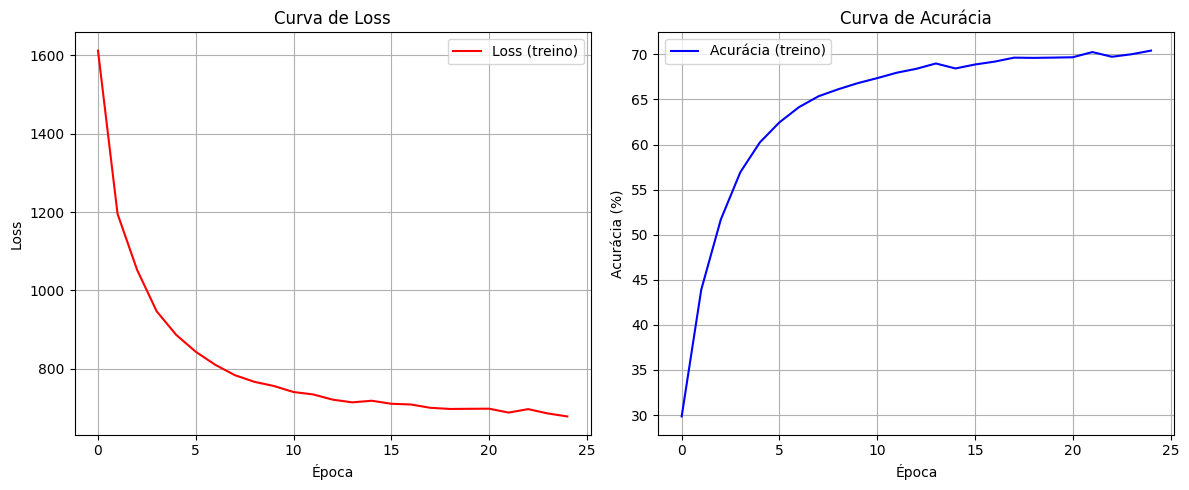

In [11]:
# 📊 Visualização das métricas
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label="Loss (treino)", color='red')
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Curva de Loss")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_acc_history, label="Acurácia (treino)", color='blue')
plt.xlabel("Época")
plt.ylabel("Acurácia (%)")
plt.title("Curva de Acurácia")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
%pip install streamlit

In [15]:
import streamlit as st
import torch
from torchvision import transforms, models
from PIL import Image

In [17]:
torch.save(model.state_dict(), "modelo_treinado.pth")


In [18]:
# 🧠 Configuração
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet18(weights=None)
model.fc = torch.nn.Linear(model.fc.in_features, 10)  # CIFAR-10 tem 10 classes
model.load_state_dict(torch.load("modelo_treinado.pth", map_location=device))  # arquivo salvo
model.eval().to(device)

classes = ['avião', 'automóvel', 'pássaro', 'gato', 'veado', 'cachorro', 'sapo', 'cavalo', 'navio', 'caminhão']


In [19]:
# 🎨 Transformação
transformacao = transforms.Compose([
    transforms.Resize(32),
    transforms.CenterCrop(32),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [20]:
# 🖼️ Interface
st.title("Classificador de Imagens com PyTorch 🚀")
st.markdown("Treinado com CIFAR-10 usando GPU")

imagem_upada = st.file_uploader("Envie uma imagem", type=["jpg", "png"])

if imagem_upada:
    imagem = Image.open(imagem_upada).convert("RGB")
    st.image(imagem, caption="Imagem enviada", use_column_width=True)

    input_tensor = transformacao(imagem).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(input_tensor)
        _, pred = torch.max(output, 1)
        label = classes[pred.item()]

    st.success(f"🧠 Predição: **{label}**")

2025-07-21 22:17:38.230 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-21 22:17:38.309 
  command:

    streamlit run c:\Users\marse\Documentos\scoras\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-07-21 22:17:38.311 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-21 22:17:38.312 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-21 22:17:38.313 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-21 22:17:38.314 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-21 22:17:38.315 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-21 22:17:38.316 Thread 'MainThr

In [ ]:
# rodar streamlit run app.py


UsageError: Line magic function `%streamlit` not found.
